In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [190]:
# Take a look at dataset
df = pd.read_csv("traffic_accidents.csv")
df.head()

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,TOP_TRAFFIC_ACCIDENT_OFFENSE,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2
0,40161061,NaN,202020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40541217,2.020111e+09,202011104054410,5441.0,0.0,TRAF - ACCIDENT,2020-02-20 17:05:00,NaN,2020-02-20 17:05:00,N COLORADO BLVD / E MLK BLVD,...,STOPPED IN TRAFFIC,OTHER,NO APPARENT,,0.0,0.0,,,,
2,40541218,2.020225e+09,202022506554410,5441.0,0.0,TRAF - ACCIDENT,2020-04-14 09:42:00,NaN,2020-04-14 10:57:00.000001,PARK AVEW / ARAPAHOE ST,...,PARKED,OTHER,NO APPARENT,,0.0,0.0,,,,
3,40541219,2.020189e+09,202018869154010,5401.0,0.0,TRAF - ACCIDENT - HIT & RUN,2020-03-28 04:51:00,NaN,2020-03-28 05:02:00,125 N FEDERAL BLVD,...,PARKED,,,,0.0,0.0,,,,
4,40541220,2.020975e+08,20209750354010,5401.0,0.0,TRAF - ACCIDENT - HIT & RUN,2020-02-08 11:00:00,NaN,2020-02-14 09:09:00,E COLFAX AVE / N COLORADO BLVD,...,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,


***Cleaning & Wrangling***

In [191]:
# convert column to datetime pandas
df['REPORTED_DATE'] = pd.to_datetime(df['REPORTED_DATE'])
df.dtypes

OBJECTID_1                                int64
INCIDENT_ID                             float64
OFFENSE_ID                                int64
OFFENSE_CODE                            float64
OFFENSE_CODE_EXTENSION                  float64
TOP_TRAFFIC_ACCIDENT_OFFENSE             object
FIRST_OCCURRENCE_DATE                    object
LAST_OCCURRENCE_DATE                     object
REPORTED_DATE                    datetime64[ns]
INCIDENT_ADDRESS                         object
GEO_X                                   float64
GEO_Y                                   float64
GEO_LON                                 float64
GEO_LAT                                 float64
DISTRICT_ID                             float64
PRECINCT_ID                             float64
NEIGHBORHOOD_ID                          object
BICYCLE_IND                             float64
PEDESTRIAN_IND                          float64
HARMFUL_EVENT_SEQ_1                      object
HARMFUL_EVENT_SEQ_2                     

In [192]:
# Set reported date to the index
df2 = df.set_index('REPORTED_DATE')
df2

,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,TOP_TRAFFIC_ACCIDENT_OFFENSE,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,INCIDENT_ADDRESS,GEO_X,...,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2
REPORTED_DATE,,,,,,,,,,,,,,,,,,,,,
NaT,40161061,NaN,202020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-20 17:05:00.000000,40541217,2.020111e+09,202011104054410,5441.0,0.0,TRAF - ACCIDENT,2020-02-20 17:05:00,NaN,N COLORADO BLVD / E MLK BLVD,3157270.0,...,STOPPED IN TRAFFIC,OTHER,NO APPARENT,,0.0,0.0,,,,
2020-04-14 10:57:00.000001,40541218,2.020225e+09,202022506554410,5441.0,0.0,TRAF - ACCIDENT,2020-04-14 09:42:00,NaN,PARK AVEW / ARAPAHOE ST,3144130.0,...,PARKED,OTHER,NO APPARENT,,0.0,0.0,,,,
2020-03-28 05:02:00.000000,40541219,2.020189e+09,202018869154010,5401.0,0.0,TRAF - ACCIDENT - HIT & RUN,2020-03-28 04:51:00,NaN,125 N FEDERAL BLVD,3133487.0,...,PARKED,,,,0.0,0.0,,,,
2020-02-14 09:09:00.000000,40541220,2.020975e+08,20209750354010,5401.0,0.0,TRAF - ACCIDENT - HIT & RUN,2020-02-08 11:00:00,NaN,E COLFAX AVE / N COLORADO BLVD,3157296.0,...,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-15 18:41:00.000000,40728123,2.020557e+09,202055653054410,5441.0,0.0,TRAF - ACCIDENT,2020-09-15 18:41:00,NaN,I25 HWYSB / S COLORADO BLVD,3157456.0,...,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,
2020-08-26 12:18:00.000000,40726013,2.020517e+09,202051693454410,5441.0,0.0,TRAF - ACCIDENT,2020-08-26 12:18:00,NaN,N COLORADO BLVD / E 41ST AVE,3157254.0,...,STOPPED IN TRAFFIC,OTHER,NO APPARENT,,0.0,0.0,,,,
2020-09-14 15:00:00.000000,40726021,2.020554e+09,202055384554010,5401.0,0.0,TRAF - ACCIDENT - HIT & RUN,2020-09-14 14:45:00,NaN,3400 BLOCK S YOSEMITE ST,3173250.0,...,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,


In [195]:
# Select only the rows from 2020 & 2021
df3 = df2.loc['2020-7-1':'2021-6-30']
df3

<ipython-input-195-6862a6a029d8>:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



,OBJECTID_1,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,TOP_TRAFFIC_ACCIDENT_OFFENSE,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,INCIDENT_ADDRESS,GEO_X,...,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2
REPORTED_DATE,,,,,,,,,,,,,,,,,,,,,
2020-07-10 02:29:00.000000,40344599,2.020419e+09,202041944754010,5401.0,0.0,TRAF - ACCIDENT - HIT & RUN,2020-07-10 02:00:00,NaN,1879 S GROVE ST,3133248.0,...,PARKED,OTHER,NO APPARENT,,0.0,0.0,,,,
2020-07-01 12:13:00.000000,40540950,2.020400e+09,202039976754410,5441.0,0.0,TRAF - ACCIDENT,2020-07-01 12:13:00,NaN,E EVANS AVE / S COLORADO BLVD,3157411.0,...,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,
2020-07-01 10:05:00.000000,40541015,2.020399e+09,202039942154410,5441.0,0.0,TRAF - ACCIDENT,2020-07-01 08:59:00,NaN,N CENTRAL PARK BLVD / E NORTHFIELD BLVD,3173380.0,...,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,
2020-07-02 01:09:00.000001,40541052,2.020401e+09,202040097154010,5401.0,0.0,TRAF - ACCIDENT - HIT & RUN,2020-07-01 22:54:00.000001,NaN,I70 HWYEB / N CENTRAL PARK BLVD,3173428.0,...,SLOWING,OTHER,NO APPARENT,,0.0,0.0,,,,
2020-07-09 12:42:00.000000,40333676,2.020418e+09,202041804254410,5441.0,0.0,TRAF - ACCIDENT,2020-07-09 10:45:00,NaN,E 6TH AVE / N CLAYTON ST,3153144.0,...,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-15 18:41:00.000000,40728123,2.020557e+09,202055653054410,5441.0,0.0,TRAF - ACCIDENT,2020-09-15 18:41:00,NaN,I25 HWYSB / S COLORADO BLVD,3157456.0,...,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,
2020-08-26 12:18:00.000000,40726013,2.020517e+09,202051693454410,5441.0,0.0,TRAF - ACCIDENT,2020-08-26 12:18:00,NaN,N COLORADO BLVD / E 41ST AVE,3157254.0,...,STOPPED IN TRAFFIC,OTHER,NO APPARENT,,0.0,0.0,,,,
2020-09-14 15:00:00.000000,40726021,2.020554e+09,202055384554010,5401.0,0.0,TRAF - ACCIDENT - HIT & RUN,2020-09-14 14:45:00,NaN,3400 BLOCK S YOSEMITE ST,3173250.0,...,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,


In [196]:
# Subset the columns of data I want to take a closer look at
subset1 = df3[['TOP_TRAFFIC_ACCIDENT_OFFENSE', 'DISTRICT_ID', 'PRECINCT_ID', 'NEIGHBORHOOD_ID', 
              'BICYCLE_IND', 'PEDESTRIAN_IND', 'TU2_DRIVER_ACTION', 'ROAD_CONDITION', 'LIGHT_CONDITION', 'SERIOUSLY_INJURED', 'FATALITIES', 
               'GEO_LAT', 'GEO_LON']]
subset1.head()

,TOP_TRAFFIC_ACCIDENT_OFFENSE,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND,TU2_DRIVER_ACTION,ROAD_CONDITION,LIGHT_CONDITION,SERIOUSLY_INJURED,FATALITIES,GEO_LAT,GEO_LON
REPORTED_DATE,,,,,,,,,,,,,
2020-07-10 02:29:00.000000,TRAF - ACCIDENT - HIT & RUN,4.0,421.0,Mar Lee,0.0,0.0,OTHER,DRY,DARK-UNLIGHTED,0.0,0.0,39.682762,-105.026567
2020-07-01 12:13:00.000000,TRAF - ACCIDENT,3.0,314.0,University Park,0.0,0.0,OTHER,DRY,DAY LIGHT,0.0,0.0,39.678415,-104.940749
2020-07-01 10:05:00.000000,TRAF - ACCIDENT,5.0,511.0,Central Park,0.0,0.0,OTHER,DRY,DAY LIGHT,0.0,0.0,39.785728,-104.883070
2020-07-02 01:09:00.000001,TRAF - ACCIDENT - HIT & RUN,5.0,512.0,Central Park,0.0,0.0,OTHER,DRY,DARK-LIGHTED,0.0,0.0,39.777138,-104.882975
2020-07-09 12:42:00.000000,TRAF - ACCIDENT,2.0,311.0,Cherry Creek,0.0,0.0,OTHER,DRY,DAY LIGHT,0.0,0.0,39.725610,-104.955543


In [197]:
# Clean up data in columns 
sub2 = subset1.replace({'TOP_TRAFFIC_ACCIDENT_OFFENSE': {'TRAF - ACCIDENT               ': 'accident', 
                                                         'TRAF - ACCIDENT - HIT & RUN   ': 'hitnrun', 
                                                         'TRAF - ACCIDENT - SBI         ': 'sbi',
                                                        'TRAF - ACCIDENT - POLICE      ': 'police', 
                                                        'TRAF - ACCIDENT - FATAL       ': 'fatal', 
                                                        'TRAF - ACCIDENT - DUI/DUID    ': 'dui/duid'}})

sub2 = sub2.replace({'ROAD_CONDITION': {'  ': 'unknown'}})
sub2 = sub2.replace({'LIGHT_CONDITION': {'  ': 'unknown'}})
sub2 = sub2.replace({'TU2_DRIVER_ACTION': {'  ': 'none'}})

# Replace nans with zeros where applicable
sub2['BICYCLE_IND'].fillna(0, inplace=True)
sub2['PEDESTRIAN_IND'].fillna(0, inplace=True)
sub2['SERIOUSLY_INJURED'].fillna(0, inplace=True)
sub2['FATALITIES'].fillna(0, inplace=True)
sub2['DISTRICT_ID'].fillna(0, inplace=True)
sub2['PRECINCT_ID'].fillna(0, inplace=True)
sub2['NEIGHBORHOOD_ID'].fillna('unknown', inplace=True)
sub2['TU2_DRIVER_ACTION'].fillna('none', inplace=True)

In [36]:
# Change df to lowercase
#sub2 = sub2.apply(lambda x: x.astype(str).str.lower())  #This makes the next step not work???

In [198]:
# Change columns with float to int
cols = ['DISTRICT_ID', 'BICYCLE_IND', 'PEDESTRIAN_IND', 'SERIOUSLY_INJURED', 'FATALITIES', 'PRECINCT_ID']
sub2[cols] = sub2[cols].applymap(np.int64)
sub2.head()

,TOP_TRAFFIC_ACCIDENT_OFFENSE,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,BICYCLE_IND,PEDESTRIAN_IND,TU2_DRIVER_ACTION,ROAD_CONDITION,LIGHT_CONDITION,SERIOUSLY_INJURED,FATALITIES,GEO_LAT,GEO_LON
REPORTED_DATE,,,,,,,,,,,,,
2020-07-10 02:29:00.000000,hitnrun,4,421,Mar Lee,0,0,OTHER,DRY,DARK-UNLIGHTED,0,0,39.682762,-105.026567
2020-07-01 12:13:00.000000,accident,3,314,University Park,0,0,OTHER,DRY,DAY LIGHT,0,0,39.678415,-104.940749
2020-07-01 10:05:00.000000,accident,5,511,Central Park,0,0,OTHER,DRY,DAY LIGHT,0,0,39.785728,-104.883070
2020-07-02 01:09:00.000001,hitnrun,5,512,Central Park,0,0,OTHER,DRY,DARK-LIGHTED,0,0,39.777138,-104.882975
2020-07-09 12:42:00.000000,accident,2,311,Cherry Creek,0,0,OTHER,DRY,DAY LIGHT,0,0,39.725610,-104.955543


In [199]:
sub2.describe()

,DISTRICT_ID,PRECINCT_ID,BICYCLE_IND,PEDESTRIAN_IND,SERIOUSLY_INJURED,FATALITIES,GEO_LAT,GEO_LON
count,17203.000000,17203.000000,17203.000000,17203.000000,17203.000000,17203.000000,16661.000000,16661.000000
mean,3.240888,327.831774,0.010638,0.018718,0.026507,0.003778,39.732263,-104.959174
std,1.682953,172.879568,0.103719,0.142227,0.179121,0.062295,0.041440,0.069067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.614407,-105.206197
25%,2.000000,212.000000,0.000000,0.000000,0.000000,0.000000,39.705095,-105.007806
50%,3.000000,313.000000,0.000000,0.000000,0.000000,0.000000,39.738292,-104.977614
75%,5.000000,423.000000,0.000000,0.000000,0.000000,0.000000,39.765623,-104.915218
max,7.000000,759.000000,2.000000,3.000000,4.000000,2.000000,39.901217,-104.665508


In [200]:
sub2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17203 entries, 2020-07-10 02:29:00 to 2020-08-24 05:59:00
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TOP_TRAFFIC_ACCIDENT_OFFENSE  17203 non-null  object 
 1   DISTRICT_ID                   17203 non-null  int64  
 2   PRECINCT_ID                   17203 non-null  int64  
 3   NEIGHBORHOOD_ID               17203 non-null  object 
 4   BICYCLE_IND                   17203 non-null  int64  
 5   PEDESTRIAN_IND                17203 non-null  int64  
 6   TU2_DRIVER_ACTION             17203 non-null  object 
 7   ROAD_CONDITION                17203 non-null  object 
 8   LIGHT_CONDITION               17203 non-null  object 
 9   SERIOUSLY_INJURED             17203 non-null  int64  
 10  FATALITIES                    17203 non-null  int64  
 11  GEO_LAT                       16661 non-null  float64
 12  GEO_LON                  

In [207]:
# Use mapbox to display points on map
import plotly.express as px
px.set_mapbox_access_token(open("mapbox_access_token.txt").read())
fig = px.scatter_mapbox(sub2, lat="GEO_LAT", lon="GEO_LON", zoom=10, opacity=0.1)
fig.show()

In [210]:
# Add a count column the whole subset of data to aggregate on 
sub2['count'] = 1

In [211]:
# Save cleaned traffic data to bring up in R or Tableau
sub2.to_csv("clean_traffic.csv")

***EDA***

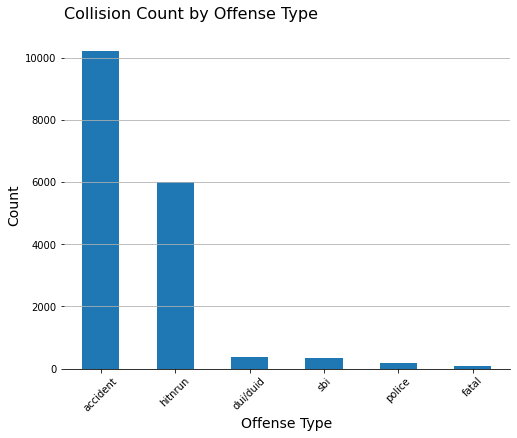

In [274]:
# Area plot
fig, ax = plt.subplots()

# Remove the right border
right = ax.spines["right"]
right.set_visible(False)

# Remove the top border
top = ax.spines["top"]
top.set_visible(False)

# Remove left border
left = ax.spines["left"]
left.set_visible(False)

ax = sub2['TOP_TRAFFIC_ACCIDENT_OFFENSE'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title("Collision Count by Offense Type\n", size=16, loc='left')
plt.xlabel("Offense Type", size=14)
plt.ylabel("Count", size=14)
plt.ylim(0, 10500)
plt.grid(axis='y')
plt.xticks(rotation=45)

plt.show()

In [312]:
# Create labels using list of countries
offense = ['Accident', 'Hit & Run', 'DUI/DUID', 'SBI', 'Police', 'Fatal']

# Write a function to translate the data into a percentage
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct)

In [316]:
pie = sub2.TOP_TRAFFIC_ACCIDENT_OFFENSE.value_counts()
pie

accident    10228
hitnrun      5993
dui/duid      383
sbi           341
police        192
fatal          66
Name: TOP_TRAFFIC_ACCIDENT_OFFENSE, dtype: int64

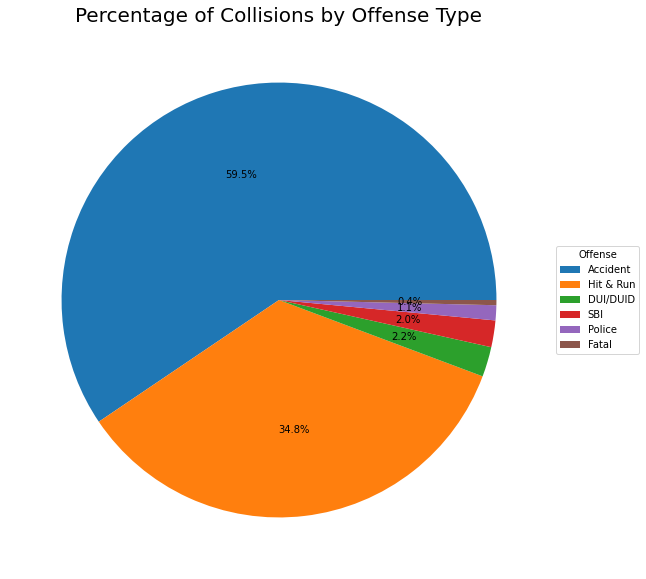

In [323]:
# Create pie chart
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(pie, autopct=lambda pct: func(pct, pie),
                                  textprops=dict(color="black"))

ax.legend(wedges, offense,
          title="Offense",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10)
ax.set_title("Percentage of Collisions by Offense Type", size=20)
plt.show()

Text(0, 0.5, 'Frequency')

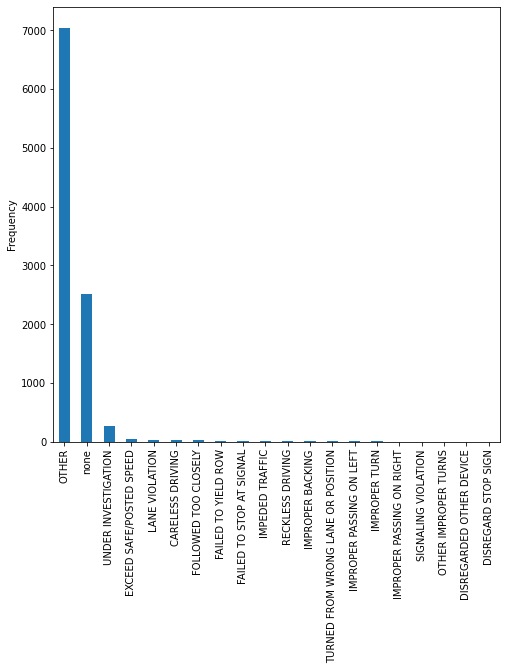

In [116]:
ax = sub2['TU2_DRIVER_ACTION'].value_counts().plot(kind='bar', figsize=(8,8))
ax.set_ylabel("Frequency")

In [241]:
sub2.BICYCLE_IND.value_counts()

0    17022
1      179
2        2
Name: BICYCLE_IND, dtype: int64

In [242]:
sub2.PEDESTRIAN_IND.value_counts()

0    16896
1      293
2       13
3        1
Name: PEDESTRIAN_IND, dtype: int64

Text(0, 0.5, 'Frequency')

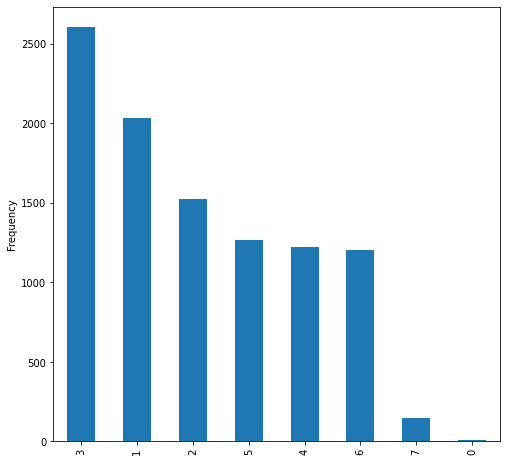

In [96]:
ax = sub2['DISTRICT_ID'].value_counts().plot(kind='bar', figsize=(8,8))
ax.set_ylabel("Frequency")

In [113]:
sub2.PRECINCT_ID.value_counts()

311    649
312    517
123    416
512    369
0      329
212    326
313    325
113    324
324    321
412    318
611    315
122    306
112    299
221    297
511    283
323    275
213    272
111    266
623    248
211    243
321    242
121    234
612    233
423    228
322    226
421    221
411    221
622    217
222    211
422    202
521    199
522    197
621    196
223    189
314    154
759     90
523     62
Name: PRECINCT_ID, dtype: int64

In [89]:
sub2.NEIGHBORHOOD_ID.value_counts()

Central Park    584
Baker           503
Five Points     380
unknown         329
Lincoln Park    313
               ... 
Skyland          26
Country Club     19
Kennedy          19
Wellshire        16
Indian Creek      7
Name: NEIGHBORHOOD_ID, Length: 79, dtype: int64

Text(0, 0.5, 'Frequency')

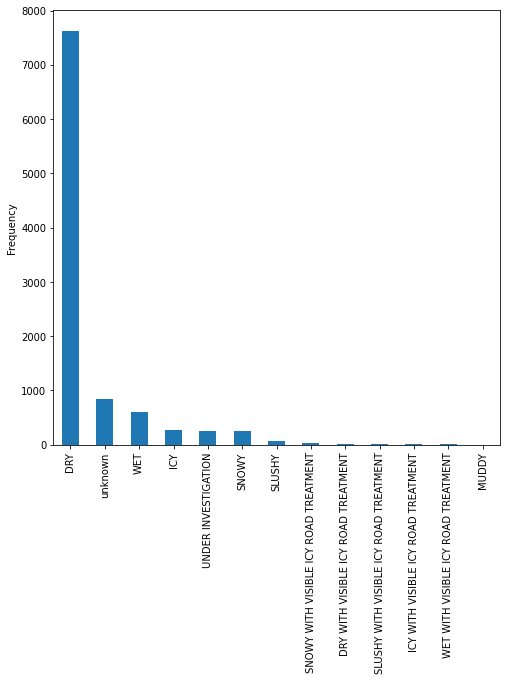

In [94]:
ax = sub2['ROAD_CONDITION'].value_counts().plot(kind='bar', figsize=(8,8))
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

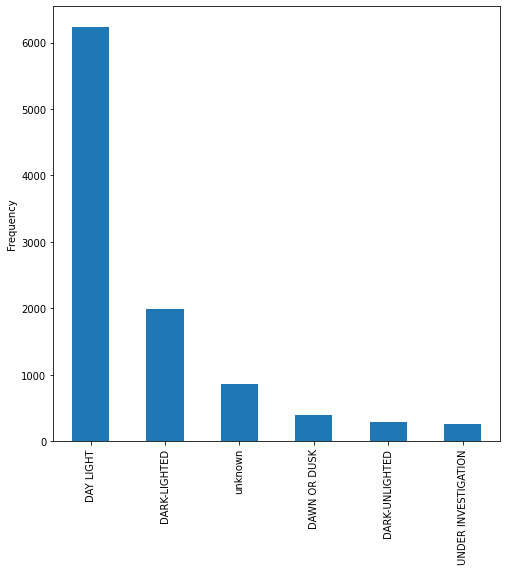

In [95]:
ax = sub2['LIGHT_CONDITION'].value_counts().plot(kind='bar', figsize=(8,8))
ax.set_ylabel("Frequency")

***EDA Maps***

In [292]:
# Create a few subsets to dig into deeper
dui = sub2[sub2["TOP_TRAFFIC_ACCIDENT_OFFENSE"] == 'dui/duid']
hitnruns = sub2[sub2["TOP_TRAFFIC_ACCIDENT_OFFENSE"] == 'hitnrun']
fatal_sbi = sub2[(sub2['FATALITIES'] > 0) | (sub2['SERIOUSLY_INJURED'] > 0)]
bike_ped = sub2[(sub2['BICYCLE_IND'] > 0) | (sub2['PEDESTRIAN_IND'] > 0)]
bike = sub2[sub2['BICYCLE_IND'] > 0]
ped = sub2[sub2['PEDESTRIAN_IND'] > 0]

district = sub2[(sub2['DISTRICT_ID'] == 3) | (sub2['DISTRICT_ID'] == 1)]
precinct311 = sub2[sub2['PRECINCT_ID'] == 311]
precinct312 = sub2[sub2['PRECINCT_ID'] == 312]
neighborhood = sub2[(sub2['NEIGHBORHOOD_ID'] == 'Central Park') | (sub2['NEIGHBORHOOD_ID'] == 'Baker')]

In [307]:
# Create dictionary for color map of offense type
color = {'accident': 'cyan', 'hitnrun': 'slategrey', 'dui/duid': 'limegreen', 'police': 'magenta', 
         'sbi': 'darkorange', 'fatal': 'crimson'}

# Add this to below plot to use this color mapping
# color_discrete_map=color

In [311]:
px.set_mapbox_access_token(open("mapbox_access_token.txt").read())
fig = px.scatter_mapbox(neighborhood, lat="GEO_LAT", lon="GEO_LON", zoom=10, color=neighborhood.TOP_TRAFFIC_ACCIDENT_OFFENSE, color_discrete_map=color)
fig.show()

***Time Series EDA***

In [ ]:
# Add a count column the whole subset of data to aggregate on 
sub2['count'] = 1

In [243]:
# Group data by the hour
data = sub2.groupby(sub2.index.hour).count()

# Extract only the count information
data2 = data['count']
print(data2)

REPORTED_DATE
0      381
1      255
2      223
3      189
4      188
5      204
6      354
7      641
8      833
9      830
10     890
11     969
12    1086
13    1141
14    1219
15    1333
16    1284
17    1162
18     989
19     861
20     640
21     534
22     569
23     428
Name: count, dtype: int64


<AxesSubplot:xlabel='REPORTED_DATE'>

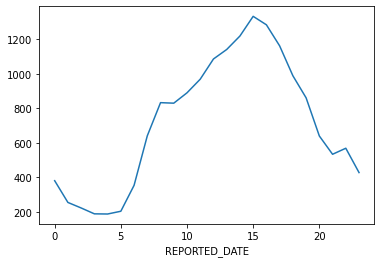

In [244]:
# Plot event count per hour
data2.plot()

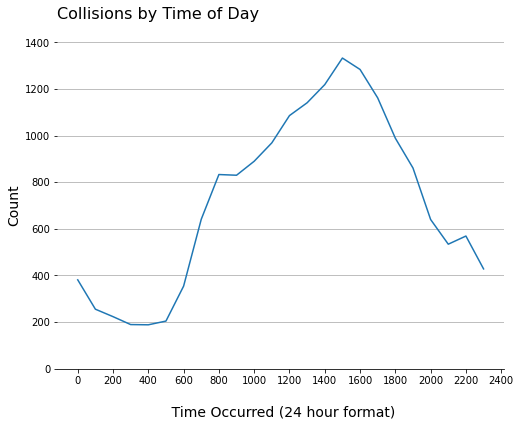

In [272]:
# plot
fig, ax = plt.subplots()

# Remove the right border
right = ax.spines["right"]
right.set_visible(False)

# Remove the top border
top = ax.spines["top"]
top.set_visible(False)

# Remove left border
left = ax.spines["left"]
left.set_visible(False)

ax = data2.plot(figsize=(8,6))
plt.title("Collisions by Time of Day\n", size=16, loc='left')
plt.xlabel("\n Time Occurred (24 hour format)", size=14)
plt.ylabel("Count", size=14)
plt.ylim(0, 1400)
plt.grid(axis='y')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24], [0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400])
plt.show()

In [245]:
# Create a dataframe containing count of events per month
monthly = sub2.resample("1M").agg({'count':'sum'})
print(monthly)

               count
REPORTED_DATE       
2020-07-31      1370
2020-08-31      1415
2020-09-30      1451
2020-10-31      1568
2020-11-30      1259
2020-12-31      1378
2021-01-31      1386
2021-02-28      1305
2021-03-31      1397
2021-04-30      1481
2021-05-31      1592
2021-06-30      1601


<AxesSubplot:xlabel='REPORTED_DATE'>

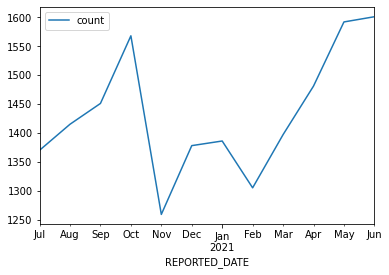

In [246]:
monthly.plot()

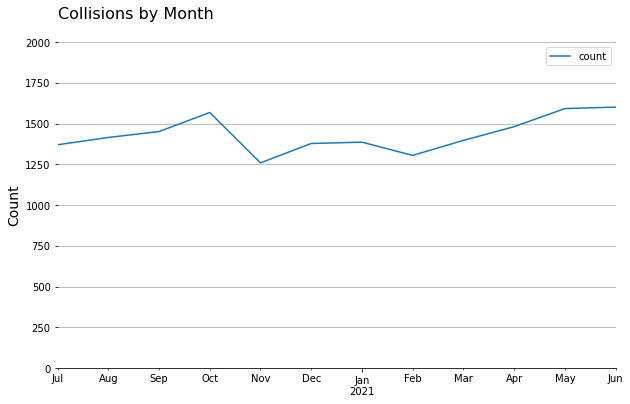

In [273]:
ax = monthly.plot(figsize=(10,6))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title("Collisions by Month\n", size=16, loc='left')
plt.ylabel("Count", size=14)
plt.ylim(0, 2000)
plt.grid(axis='y')
plt.xlabel('')

plt.show()

In [180]:
# Group data by the hour
t = sub2.groupby(sub2.index.month).count()

# Extract only the count information
b = t['count']
print(b)

REPORTED_DATE
1    1386
2    1305
3    1397
4    1481
5    1592
6    1601
7    1258
Name: count, dtype: int64


In [181]:
# Group data by the hour
l = sub2.groupby(sub2.index.day).count()

# Extract only the count information
m = l['count']
print(m)

REPORTED_DATE
1     316
2     317
3     317
4     322
5     335
6     333
7     358
8     361
9     332
10    358
11    302
12    352
13    315
14    314
15    345
16    349
17    327
18    371
19    407
20    368
21    347
22    373
23    339
24    295
25    315
26    371
27    320
28    270
29    251
30    228
31    112
Name: count, dtype: int64
